<a href="https://colab.research.google.com/github/B-hub-hue/Python.exam_polymer/blob/main/Python_exam_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

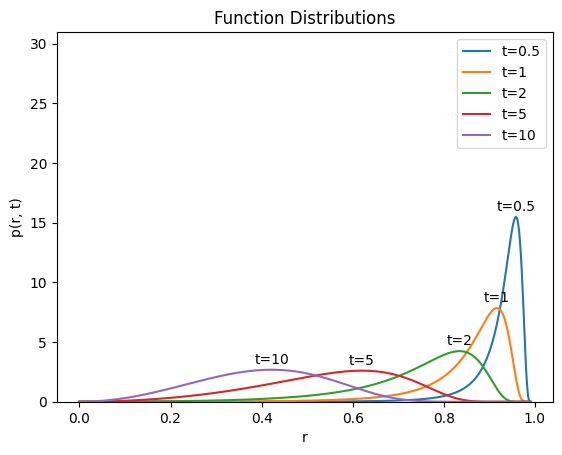

In [2]:
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
def P(r= np.array([0.0, 0.2, 0.4, 0.6, 0.8, 0.99]), t=(0.5, 1, 2, 5, 10)):
# np.random.randint(0.1, 10, size=10)
  t = np.array(t)
  result=[]

  for time_val in t:
   a = 0.75*time_val
   C = 1/((np.pi**3/2)*(np.exp(-a))*(a**(-3/2))*((1+3*a**-1)+((15/4)*(a**-2))))
   prob = 4*C*np.pi*(r**2/(1-r**2)**(9/2))*np.exp((-3*time_val/4)*(1/(1-r**2)))
   result.append(prob)
   prob /= np.trapz(prob, r)  # Normalize using trapezoidal integration


  return np.array(result)

r= np.linspace(0, 0.99, 1000)#np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
t_values = (0.5, 1, 2, 5, 10)
result = P(r, t_values)

for i in range(result.shape[0]):
    plt.plot(r, result[i])
    # Annotate t value above each curve at the peak
    peak_x = r[np.argmax(result[i])]  # Find the x position of the peak
    peak_y = np.max(result[i])        # Find the y position of the peak
    plt.text(peak_x, peak_y + 0.5, f't={t_values[i]}', ha='center', fontsize=10)


#plt.plot(result)
plt.ylim(0, 2 *np.max(result))
plt.xlabel('r')
plt.ylabel('p(r, t)')
plt.title('Function Distributions')
plt.legend(['t=0.5', 't=1', 't=2', 't=5', 't=10'])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
lP = 10  # persistence length
L = 1  # total contour length
dL = 0.001   # segment length
nSegments = int(L / dL)  # number of segments

# Initialize the chain
r = np.zeros((nSegments, 3))  # positions of the segments
t = np.zeros((nSegments, 3))  # tangent vectors of the segments

# Start with the first segment
t[0] = np.random.normal(size=3)  # random initial direction
t[0] /= np.linalg.norm(t[0])  # normalize

# Iteratively generate the chain
for i in range(1, nSegments):
    theta = np.random.normal(0, np.sqrt(dL / lP))  # small angle
    phi = np.random.uniform(0, 2 * np.pi)  # azimuthal angle

    # Update the tangent vector using spherical coordinates
    R = np.array([[np.cos(phi), -np.sin(phi), 0],
                   [np.sin(phi), np.cos(phi), 0],
                   [0, 0, 1]])

    t[i] = R @ t[i - 1]  # Rotate tangent vector
    t[i] /= np.linalg.norm(t[i])  # normalize

    # Update the position of the chain
    r[i] = r[i - 1] + dL * t[i]
#plt.figure(figsize=(10, 6))
#plt.hist(R, bins=30, density=True, alpha=0.7)
# Visualize the chain
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.plot(r[:, 0], r[:, 1], r[:, 2])
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')
#plt.show()


End-to-End Distance: 69.43714145603607


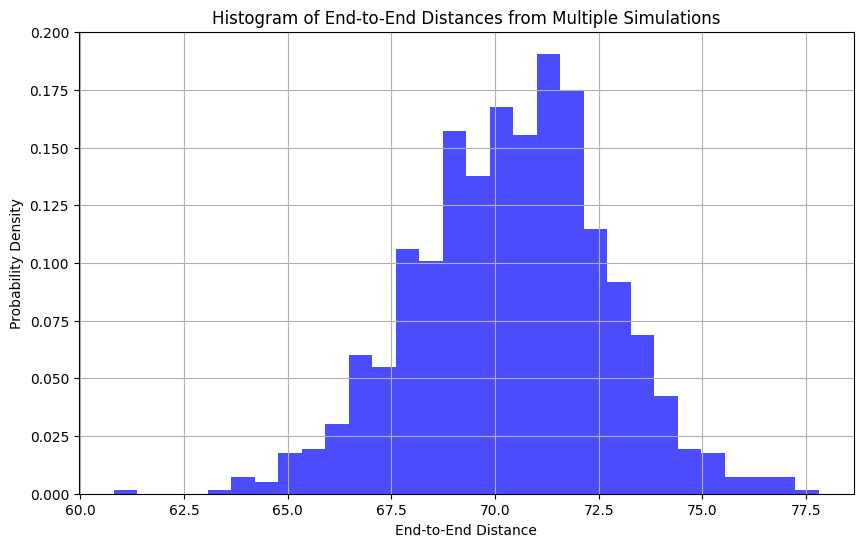

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for P(theta)
def P_theta(theta, delta_theta):
    return theta * np.exp(-theta * (theta / delta_theta)**2)

# Parameters
N = 100  # Number of segments
L = 1.0  # Length of each segment
delta_theta = 1.0  # Example value for delta_theta

# Generate theta based on the desired distribution
def generate_theta_samples(num_samples, delta_theta):
    theta_samples = []
    for _ in range(num_samples):
        # Sample theta from a distribution (can use rejection sampling if needed)
        while True:
            theta = np.random.uniform(0, 5 * delta_theta)  # Adjust upper limit as needed
            prob = P_theta(theta, delta_theta)
            if np.random.rand() < prob:  # Acceptance criterion
                theta_samples.append(theta)
                break
    return np.array(theta_samples)

# Generate uniformly distributed phi
def generate_phi_samples(num_samples):
    return np.random.uniform(0, 2 * np.pi, num_samples)

# Generate samples
thetas = generate_theta_samples(N, delta_theta)
phis = generate_phi_samples(N)

# Function to calculate end-to-end distance for given theta and phi
def calculate_end_to_end_distance(N, L, thetas, phis):
    R_x = np.sum(L * np.sin(thetas) * np.cos(phis))
    R_y = np.sum(L * np.sin(thetas) * np.sin(phis))
    R_z = np.sum(L * np.cos(thetas))
    R = np.sqrt(R_x**2 + R_y**2 + R_z**2)
    return R

# Calculate end-to-end distance
end_to_end_distance = calculate_end_to_end_distance(N, L, thetas, phis)

print(f"End-to-End Distance: {end_to_end_distance}")

# Optional: Histogram of distances for multiple simulations
num_simulations = 1000
distances = []

for _ in range(num_simulations):
    thetas = generate_theta_samples(N, delta_theta)
    phis = generate_phi_samples(N)
    distances.append(calculate_end_to_end_distance(N, L, thetas, phis))

# Plot histogram of end-to-end distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, density=True, alpha=0.7, color='blue')
plt.xlabel('End-to-End Distance')
plt.ylabel('Probability Density')
plt.title('Histogram of End-to-End Distances from Multiple Simulations')
plt.grid()
plt.show()
